<a href="https://colab.research.google.com/github/Brit0812/Neural_Network_Charity_Analysis/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#importing the file from the comp to colab df=pd.read_csv(io.StringIO(data["file_name.csv"].decode('utf-8')))
from google.colab import files
import io

data=files.upload()

Saving charity_data.csv to charity_data.csv


In [3]:
application_df=pd.read_csv(io.StringIO(data["charity_data.csv"].decode('utf-8')))
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME', 'USE_CASE', 'ORGANIZATION' ], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,1,0,N,5000,1
1,T3,Independent,C2000,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,1,0,N,5000,0
3,T3,CompanySponsored,C2000,1,10000-24999,N,6692,1
4,T3,Independent,C1000,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
#ask_amount could be placed into buckets same with classification
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type= application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?- less than 500 theyll go into other. 
replace_application= list(application_type[application_type< 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
class_count= application_df["CLASSIFICATION"].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# Determine which values to replace if counts are less than ..?--
replace_class= list(class_count[class_count< 1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
#binning
ask_amt= application_df["ASK_AMT"].value_counts()
ask_amt

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

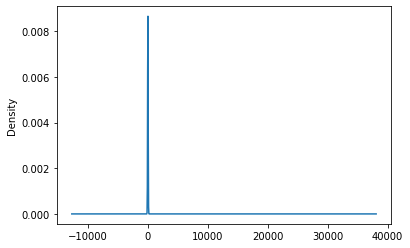

In [10]:
ask_amt.plot.density()
#values around 1 and 3?

In [11]:
# Determine which values to replace if counts are less than ...?- less than 500 theyll go into other. 
replace_amt= list(ask_amt[ask_amt< 3].index)

# Replace in dataframe
for amt in replace_amt:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,"Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()
#a large part of the column is in the other bucket- this wont work
#possibly making a range- bucketing the ranges?
#test later 

5000     25398
Other     8889
15583        3
6725         3
10478        3
63981        3
Name: ASK_AMT, dtype: int64

In [ ]:
# Determine which values to replace if counts are less than ...?- less than 500 theyll go into other. 
replace_amt= list(ask_amt[ask_amt< ######].index)

#how many clumps of amount asked should there be? 
#make a for loop to filter through and place it in the bucket? 
#
# Replace in dataframe
# for amt in replace_amt:
    # application_df.ASK_AMT = application_df.ASK_AMT.replace(amt,"Other")
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()
#skip for now- need to complete a for loop 

In [10]:
# Generate our categorical variable lists
application_cat= application_df.dtypes[application_df.dtypes=="object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df= pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df= application_df.merge(encode_df, left_index=True, right_index= True)
#drop the column dont need dups
application_df= application_df.drop(columns= application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays- use IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values
y=application_df.IS_SUCCESSFUL.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
#testing it with another random_state

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Attempt 1: Increased the neurons

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features= len(X_train_scaled[0])
hidden_nodes_layer1= 120
hidden_nodes_layer2=50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add (tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                6050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# Train the model
fit_model=nn.fit(X_train, y_train, epochs=120)

Epoch 1/120
804/804 [==============================] - 2s 2ms/step - loss: 43968.5234 - accuracy: 0.4955
Epoch 2/120
804/804 [==============================] - 1s 2ms/step - loss: 32038.9062 - accuracy: 0.4915
Epoch 3/120
804/804 [==============================] - 1s 2ms/step - loss: 35739.3281 - accuracy: 0.4979
Epoch 4/120
804/804 [==============================] - 1s 2ms/step - loss: 29746.0156 - accuracy: 0.5025
Epoch 5/120
804/804 [==============================] - 1s 2ms/step - loss: 7867.0117 - accuracy: 0.5071
Epoch 6/120
804/804 [==============================] - 1s 2ms/step - loss: 19264.8008 - accuracy: 0.4893
Epoch 7/120
804/804 [==============================] - 2s 2ms/step - loss: 14616.2100 - accuracy: 0.4993
Epoch 8/120
804/804 [==============================] - 1s 2ms/step - loss: 3436.4531 - accuracy: 0.5106
Epoch 9/120
804/804 [==============================] - 1s 2ms/step - loss: 9644.3008 - accuracy: 0.5007
Epoch 10/120
804/804 [==============================] - 1s

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#improvement on the loss and accuracy!  

268/268 - 0s - loss: 0.7883 - accuracy: 0.6745 - 444ms/epoch - 2ms/step
Loss: 0.7883296012878418, Accuracy: 0.6745189428329468


Attempt 2: Additional hidden layers

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features= len(X_train_scaled[0])
hidden_nodes_layer1= 120
hidden_nodes_layer2=50
hidden_nodes_layer3=15
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Second hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add (tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 120)               4200      
                                                                 
 dense_8 (Dense)             (None, 50)                6050      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# Train the model
fit_model=nn.fit(X_train, y_train, epochs=135)

Epoch 1/135
804/804 [==============================] - 3s 3ms/step - loss: 20575.7656 - accuracy: 0.4904
Epoch 2/135
804/804 [==============================] - 2s 2ms/step - loss: 16011.8789 - accuracy: 0.4850
Epoch 3/135
804/804 [==============================] - 2s 2ms/step - loss: 10844.0176 - accuracy: 0.4910
Epoch 4/135
804/804 [==============================] - 2s 2ms/step - loss: 6152.8267 - accuracy: 0.4997
Epoch 5/135
804/804 [==============================] - 2s 2ms/step - loss: 30376.2598 - accuracy: 0.5045
Epoch 6/135
804/804 [==============================] - 2s 2ms/step - loss: 4278.6899 - accuracy: 0.5181
Epoch 7/135
804/804 [==============================] - 2s 2ms/step - loss: 0.7705 - accuracy: 0.5321
Epoch 8/135
804/804 [==============================] - 2s 2ms/step - loss: 0.6954 - accuracy: 0.5321
Epoch 9/135
804/804 [==============================] - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 10/135
804/804 [==============================] - 2s 2ms/step -

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#the additional layer didnt really improve anything  

268/268 - 0s - loss: 0.7132 - accuracy: 0.5332 - 415ms/epoch - 2ms/step
Loss: 0.7131916880607605, Accuracy: 0.5331778526306152


Attempt 3: Changing the activation function from relu to tanh 

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features= len(X_train_scaled[0])
hidden_nodes_layer1= 120
hidden_nodes_layer2=50
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='tanh'))

# Second hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

# Output layer
nn.add (tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 120)               4200      
                                                                 
 dense_15 (Dense)            (None, 50)                6050      
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# Train the model
fit_model=nn.fit(X_train, y_train, epochs=120)

Epoch 1/120
804/804 [==============================] - 2s 2ms/step - loss: 0.6945 - accuracy: 0.5206
Epoch 2/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5238
Epoch 3/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5280
Epoch 4/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5284
Epoch 5/120
804/804 [==============================] - 2s 2ms/step - loss: 0.6921 - accuracy: 0.5266
Epoch 6/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5254
Epoch 7/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5287
Epoch 8/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5295
Epoch 9/120
804/804 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5270
Epoch 10/120
804/804 [==============================] - 2s 2ms/step - loss: 0.6919 - accura

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#worst accuracy- tanh doesnt work well with this model 

268/268 - 0s - loss: 0.7539 - accuracy: 0.3799 - 406ms/epoch - 2ms/step
Loss: 0.7539176940917969, Accuracy: 0.3799417018890381


Attempt 4: decrease the value of the neurons

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features= len(X_train_scaled[0])
hidden_nodes_layer1= 45
hidden_nodes_layer2=15
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add (tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add (tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 45)                1575      
                                                                 
 dense_12 (Dense)            (None, 15)                690       
                                                                 
 dense_13 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# Train the model
fit_model=nn.fit(X_train, y_train, epochs=135)

Epoch 1/135
804/804 [==============================] - 2s 2ms/step - loss: 16261.9463 - accuracy: 0.5063
Epoch 2/135
804/804 [==============================] - 2s 2ms/step - loss: 16538.9668 - accuracy: 0.4991
Epoch 3/135
804/804 [==============================] - 1s 2ms/step - loss: 8127.7339 - accuracy: 0.4947
Epoch 4/135
804/804 [==============================] - 1s 2ms/step - loss: 20238.5566 - accuracy: 0.4913
Epoch 5/135
804/804 [==============================] - 1s 2ms/step - loss: 6244.9219 - accuracy: 0.5031
Epoch 6/135
804/804 [==============================] - 1s 2ms/step - loss: 4840.3994 - accuracy: 0.5080
Epoch 7/135
804/804 [==============================] - 1s 2ms/step - loss: 19068.5996 - accuracy: 0.5034
Epoch 8/135
804/804 [==============================] - 1s 2ms/step - loss: 13061.5508 - accuracy: 0.5155
Epoch 9/135
804/804 [==============================] - 1s 2ms/step - loss: 11612.0664 - accuracy: 0.5141
Epoch 10/135
804/804 [==============================] - 1s

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
#the removal of tanh and decrease in nodes improved the accuracy significantly but the loss is very high

268/268 - 0s - loss: 1.4435 - accuracy: 0.7058 - 408ms/epoch - 2ms/step
Loss: 1.4435189962387085, Accuracy: 0.7057725787162781
